## Load data

In [1]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from cbm_functions import *
from sklearn.model_selection import train_test_split
%matplotlib inline

## loading data
data_dir = "./datasets/"
displays = np.load(data_dir + "displays.npy", "r")

displays_scaled = np.load(data_dir + "displays_scaled.npy", "r")
displays_scaled_test = np.load(data_dir + "displays_scaled_test.npy", "r")
rings= np.load(data_dir + "rings.npy", "r")
rings_test = np.load(data_dir + "rings_test.npy", "r")

params = np.load(data_dir + "params.npz", "r", allow_pickle=True)['arr_0']

## Display data

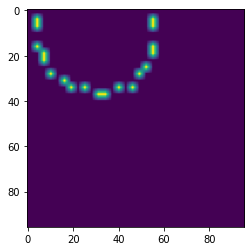

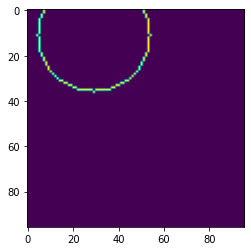

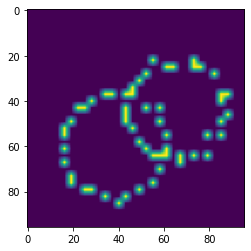

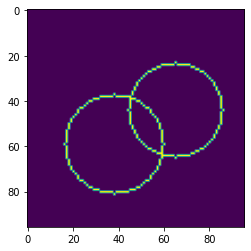

In [2]:
N = 2
empty_displays = []
for n in range(N):
    plt.imshow(displays_scaled[n])
    plt.show()
    plt.imshow(rings[n])
    plt.show()

## Create model

In [2]:
input_shape = displays_scaled[0].shape

model = Sequential()
model.add(InputLayer(input_shape))

#model.add(Conv2D(8, (3,3), padding='same', activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=None))
#model.add(BatchNormalization(momentum=0.99))

model.add(Conv2D(16, (3,3), padding='same', activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=None))
model.add(BatchNormalization(momentum=0.99))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.99))

model.add(Conv2D(1, (3,3), padding='same', activation='relu',
                 kernel_regularizer=None))

## Train model

In [3]:
#model = create_model(displays_scaled[0].shape, 3)
#opt = tf.keras.optimizers.Adam(learning_rate=1e-6)
#model.compile(optimizer=opt, loss='MeanSquaredError', metrics='accuracy')
#model.fit(displays_scaled, rings, batch_size=100, epochs=8, validation_split=0.3)

#compare_true_and_predict(displays_scaled, rings, model)

In [4]:
# load saved model
#model.save("models/2-conv-ring.model")
model = tf.keras.models.load_model("models/2-conv-ring.model")

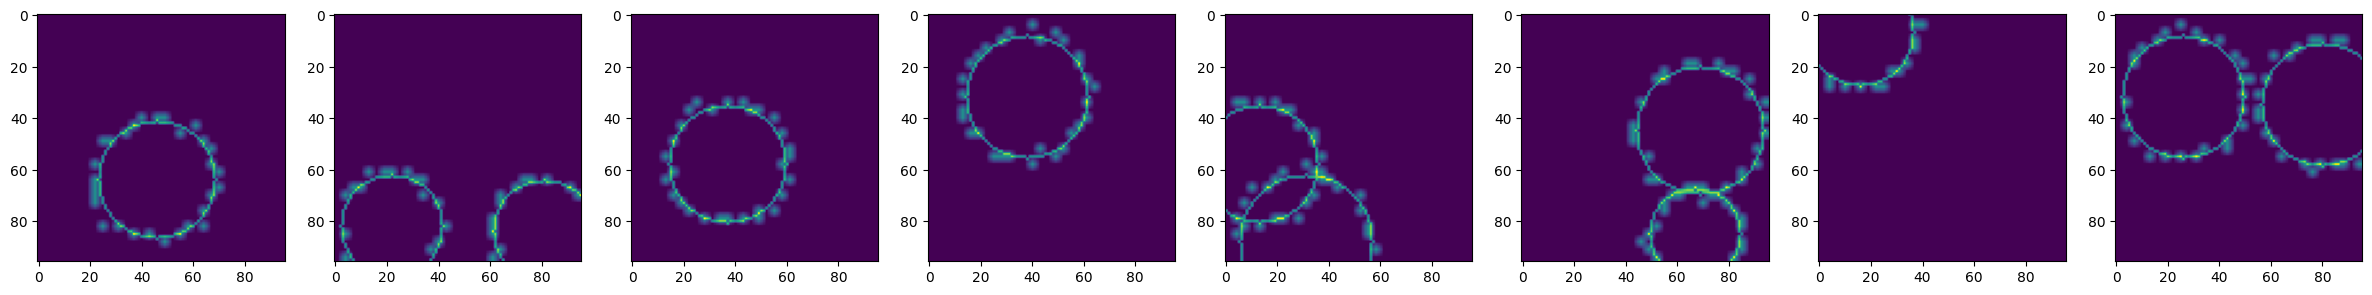

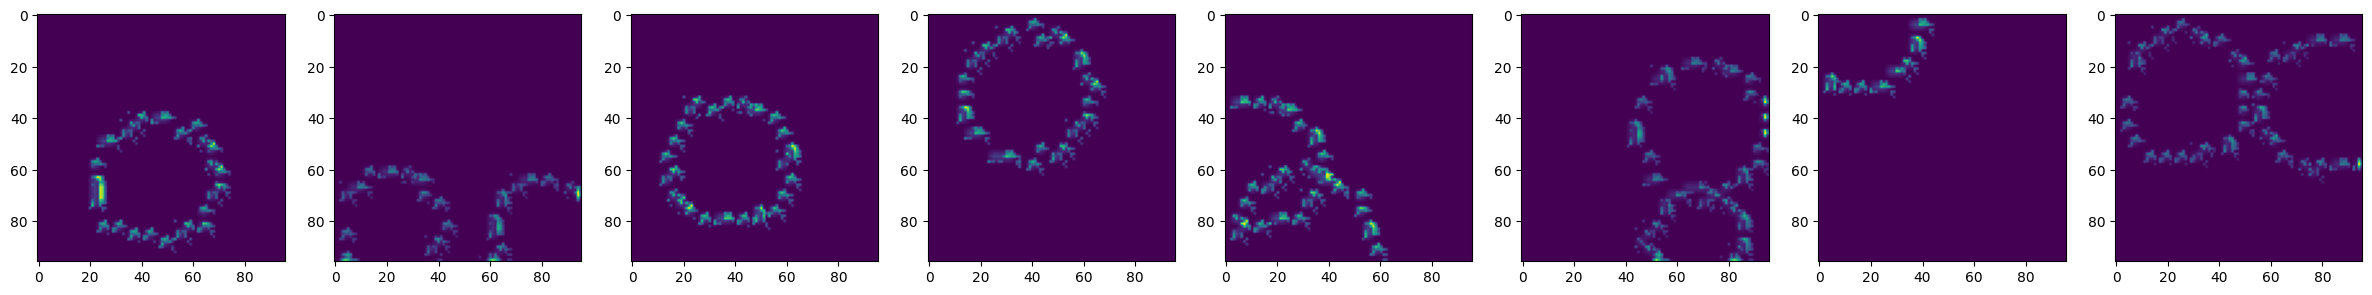

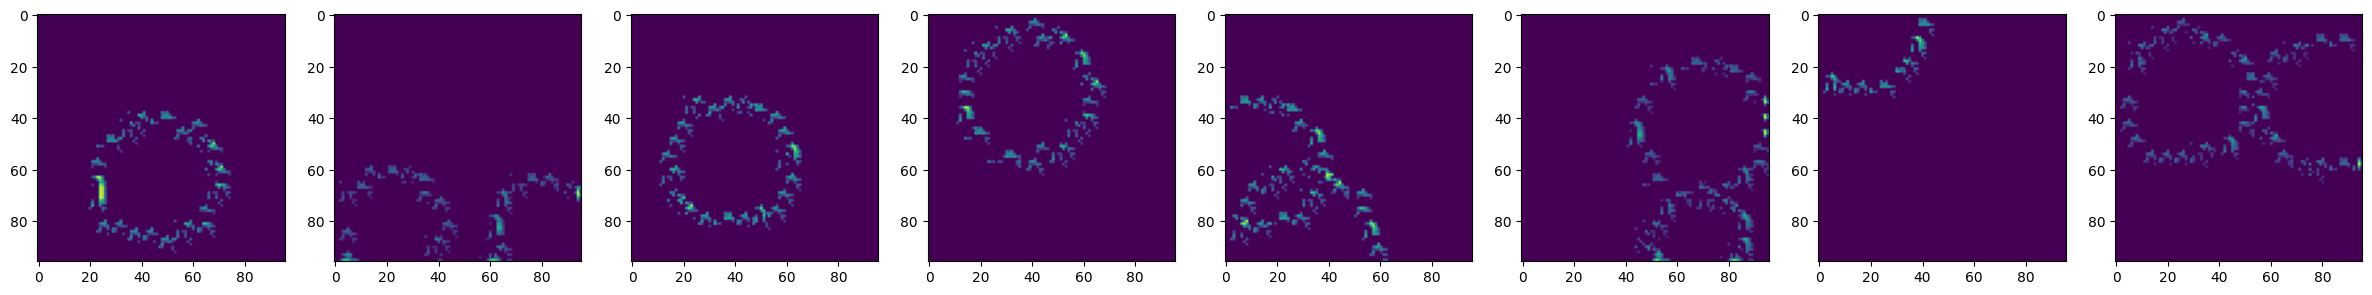

In [5]:
compare_true_and_predict(displays_scaled_test, rings_test, model, 5)